In [0]:
# Tensorboard visualization for pytorch in Google Colab
%%capture
!pip install tensorboardX
!pip install -q tf-nightly-2.0-preview
%load_ext tensorboard

In [0]:
import os
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
from tensorboardX import SummaryWriter
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from torchsummary import summary

In [3]:
# Cuda stuff
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device is " + str(device) + ".")

Device is cuda.


In [0]:
img_size = 32
channels = 3

In [0]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # 3 x 64 x 64
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2),
        )
        
        # 128 x 32 x 32
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

        )
        
        # 256 x 16 x 16
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),
        )
        
        # 512 x 8 x 8
  
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2),
        )
    
        # 1024 x 4 x 4
      
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=1, kernel_size=4, stride=1, padding=0, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, img):
        x = self.conv1(img)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        out = self.conv5(x)
        out = out.view(-1, 1)
        return out

In [0]:
class Discriminator_32(nn.Module):
    def __init__(self):
        super(Discriminator_32, self).__init__()
        # 3 x 32 x 32
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=channels, out_channels=128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2),
        )
        
        # 128 x 16 x 16
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

        )
        
        # 256 x 8 x 8
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),
        )
        
    
        # 512 x 4 x 4
      
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1, kernel_size=4, stride=1, padding=0, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, img):
        x = self.conv1(img)
        x = self.conv2(x)
        x = self.conv3(x)
        out = self.conv4(x)
        out = out.view(-1, 1)
        return out

In [0]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        # 100 x 1 x 1        
        self.convt1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=100, out_channels=1024, kernel_size = 4, stride=2, padding=0, bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
        )
        
        # 1024 x 4 x 4
        self.convt2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size = 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        )
        
        # 512 x 8 x 8
        self.convt3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size = 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
        )
        
        # 256 x 16 x 16
        self.convt4 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size = 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
        )
        
        # 128 x 32 x 32
        self.convt5 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=channels, kernel_size = 4, stride=2, padding=1, bias=False),
            nn.Tanh(),
        )
        
        # 3 x 64 x 64
        
        
    def forward(self, z):
        x = self.convt1(z)
        x = self.convt2(x)
        x = self.convt3(x)
        x = self.convt4(x)
        out = self.convt5(x)
        return out

In [0]:
class Generator_32(nn.Module):
    def __init__(self):
        super(Generator_32, self).__init__()
        
        # 100 x 1 x 1        
        self.convt1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=100, out_channels=512, kernel_size = 4, stride=2, padding=0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        )
        
        # 512 x 4 x 4
        self.convt2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size = 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
        )
        
        # 256 x 8 x 8
        self.convt3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size = 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
        )
        
        # 128 x 16 x 16
        self.convt4 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=channels, kernel_size = 4, stride=2, padding=1, bias=False),
            nn.Tanh(),
        )
        
        # 3 x 32 x 32
        
        
    def forward(self, z):
        x = self.convt1(z)
        x = self.convt2(x)
        x = self.convt3(x)
        out = self.convt4(x)
        return out

In [0]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.ConvTranspose2d or type(m) == nn.Conv2d:
        nn.init.normal_(m.weight.data, 0.0, 0.02)

In [0]:
if img_size == 64:
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
else: # assumed that img_size = 32 in that case
    discriminator = Discriminator_32().to(device)
    generator = Generator_32().to(device)
    
discriminator.apply(init_weights)
generator.apply(init_weights)

d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
loss = nn.BCELoss(reduction='mean')

In [56]:
summary(discriminator, input_size=(3, img_size, img_size))
summary(generator, input_size=(100, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 16, 16]           6,144
         LeakyReLU-2          [-1, 128, 16, 16]               0
            Conv2d-3            [-1, 256, 8, 8]         524,288
       BatchNorm2d-4            [-1, 256, 8, 8]             512
         LeakyReLU-5            [-1, 256, 8, 8]               0
            Conv2d-6            [-1, 512, 4, 4]       2,097,152
       BatchNorm2d-7            [-1, 512, 4, 4]           1,024
         LeakyReLU-8            [-1, 512, 4, 4]               0
            Conv2d-9              [-1, 1, 1, 1]           8,192
          Sigmoid-10              [-1, 1, 1, 1]               0
Total params: 2,637,312
Trainable params: 2,637,312
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.06
Params size (MB): 10.06
Estima

In [0]:
def train_discriminator(optimizer, real_data, fake_data):
    optimizer.zero_grad()
    
    # Real images
    predictions_real = discriminator(real_data)
    loss_real = loss(predictions_real, torch.ones_like(predictions_real))
    loss_real.backward()
    
    # Fake images
    predictions_fake = discriminator(fake_data)
    loss_fake = loss(predictions_fake, torch.zeros_like(predictions_fake))
    loss_fake.backward()
    
    optimizer.step()
    return (loss_real + loss_fake)/2.0

In [0]:
def train_generator(optimizer, fake_data):
    optimizer.zero_grad()
    
    predictions_fake = discriminator(fake_data)
    loss_fake = loss(predictions_fake, torch.ones_like(predictions_fake))
    loss_fake.backward()
    
    optimizer.step()
    return loss_fake

In [0]:
def noise(size):
    return Variable(torch.randn(size, 100, 1, 1)).to(device)

In [15]:
# Download Celeb_A dataset from my Google Drive, extract to 'data'
from google.colab import drive
from zipfile import ZipFile
drive.mount('/content/gdrive')
!cp 'gdrive/My Drive/datasets/img_align_celeba.zip' .
zipfile = ZipFile('img_align_celeba.zip')
zipfile.extractall(path='./data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def load_data(batch_size):
    root = 'data/'
    # resize, crop and 
    # normalize values to interval [-1, 1]
    trans = transforms.Compose([transforms.Resize(img_size), transforms.CenterCrop(img_size), transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
    train_set = dset.ImageFolder(root=root, transform=trans)

    train_loader = torch.utils.data.DataLoader(
                     dataset=train_set,
                     batch_size=batch_size,
                     shuffle=True, 
                     pin_memory=True, 
                     num_workers=6)
    return train_loader

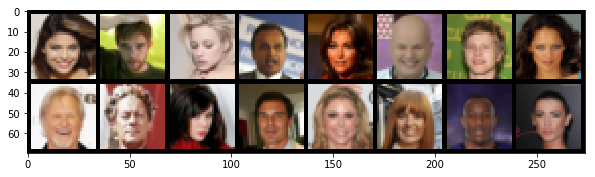

In [22]:
loader = load_data(16)

fig = plt.figure(figsize = (10,5))
for batch in loader:
    grid_plot = make_grid(batch[0], normalize=True)
    plt.imshow(np.transpose(grid_plot.numpy(), (1,2,0)))
    break

In [52]:
!rm -rf logs
%tensorboard --logdir logs/

In [53]:
num_epochs = 10
batch_size = 128

test_noise = noise(16)

train_loader = load_data(batch_size)
writer = SummaryWriter('logs/')
iterations_gen = 0 # Somethings not right with this counter
for epoch in range(num_epochs):
    loss_d = 0
    loss_g = 0
    iterations = 0

    for n_batch, batch in enumerate(train_loader):
        fake_data = generator(noise(batch_size)).detach()
        real_data = Variable(batch[0]).to(device)
        loss_d_batch = train_discriminator(d_optimizer, real_data, fake_data)
        loss_d += loss_d_batch
        
        fake_data = generator(noise(batch_size))
        loss_g_batch = train_generator(g_optimizer, fake_data)
        loss_g += loss_g_batch

        if n_batch%50 == 0:
            print('\rEpoch [%d/%d], Batch [%d/%d]' % (epoch+1, num_epochs, (iterations_gen*50)%len(train_loader), len(train_loader)), end='')
            
            writer.add_scalar('loss_d_batch', loss_d_batch, iterations_gen)
            writer.add_scalar('loss_g_batch', loss_g_batch, iterations_gen)
            
            generator.eval()
            with torch.no_grad():
                test_gen = generator(test_noise)
            generator.train()
            writer.add_image('test_gen', make_grid(test_gen), iterations_gen)
            iterations_gen += 1
          
        iterations += 1     
    writer.add_scalar('loss_d', loss_d/iterations, epoch)
    writer.add_scalar('loss_g', loss_g/iterations, epoch)

Epoch [4/10], Batch [1051/1583]

KeyboardInterrupt: ignored

In [0]:
# Save model to Google Drive
import time
timestr = time.strftime("%d%m%Y-%H%M%S")
torch.save(generator.state_dict(), 'gdrive/My Drive/models/DCGAN_gen'+timestr+'.pt')
torch.save(discriminator.state_dict(), 'gdrive/My Drive/models/DCGAN_dis'+timestr+'.pt')

In [0]:
!cp -r 'gdrive/My Drive/models/' .

In [0]:
%matplotlib inline
num_test = 32
test = vectors_to_images(generator(noise(num_test))).cpu().data.numpy()
fig = plt.figure(figsize = (10,5))
for i in range(num_test):
    fig.add_subplot(4,8,i+1)
    plt.axis('off')
    plt.imshow(test[i][0], cmap='gray', interpolation='nearest')